In [1]:
import numpy as np
import pandas as pd
from sklearn import  preprocessing # used for label encoding and imputing NaNs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import datetime as dt # we will need this to convert the date to a number of days since some point

from sklearn.tree import export_graphviz

Read data from CSV files

In [2]:
fare_data_train = pd.read_csv("train.csv", parse_dates=['pickup_time', 'drop_time'])
fare_data_train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [3]:
fare_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tripid                     17176 non-null  int64         
 1   additional_fare            16974 non-null  float64       
 2   duration                   16974 non-null  float64       
 3   meter_waiting              16974 non-null  float64       
 4   meter_waiting_fare         16974 non-null  float64       
 5   meter_waiting_till_pickup  16974 non-null  float64       
 6   pickup_time                17176 non-null  datetime64[ns]
 7   drop_time                  17176 non-null  datetime64[ns]
 8   pick_lat                   17176 non-null  float64       
 9   pick_lon                   17176 non-null  float64       
 10  drop_lat                   17176 non-null  float64       
 11  drop_lon                   17176 non-null  float64       
 12  fare

In [4]:
#ignoring dates
fare_data_train['pickup_time_only'] = fare_data_train['pickup_time'].dt.time
fare_data_train['drop_time_only'] = fare_data_train['drop_time'].dt.time

In [5]:
#encode object data
from sklearn.preprocessing import LabelEncoder
lb_label = LabelEncoder()
fare_data_train["pickup_time_only_code"] = lb_label.fit_transform(fare_data_train["pickup_time_only"])
fare_data_train["drop_time_only_code"] = lb_label.fit_transform(fare_data_train["drop_time_only"])
fare_data_train[["pickup_time_only", "pickup_time_only_code", "drop_time_only", "drop_time_only_code"]].head(5)

,pickup_time_only,pickup_time_only_code,drop_time_only,drop_time_only_code
0,00:20:00,19,00:34:00,34
1,00:56:00,52,01:09:00,69
2,01:08:00,62,01:26:00,81
3,02:27:00,118,02:37:00,133
4,03:34:00,163,03:51:00,179


In [6]:
fare_data_train["binary_label"] = np.where(fare_data_train["label"].str.contains("incorrect"), 0,1)

In [7]:
fare_data_train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pickup_time_only,drop_time_only,pickup_time_only_code,drop_time_only_code,binary_label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,00:20:00,00:34:00,19,34,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,00:56:00,01:09:00,52,69,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,01:08:00,01:26:00,62,81,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,02:27:00,02:37:00,118,133,1
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct,03:34:00,03:51:00,163,179,1


In [8]:
corrMatrix = fare_data_train.corr()

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

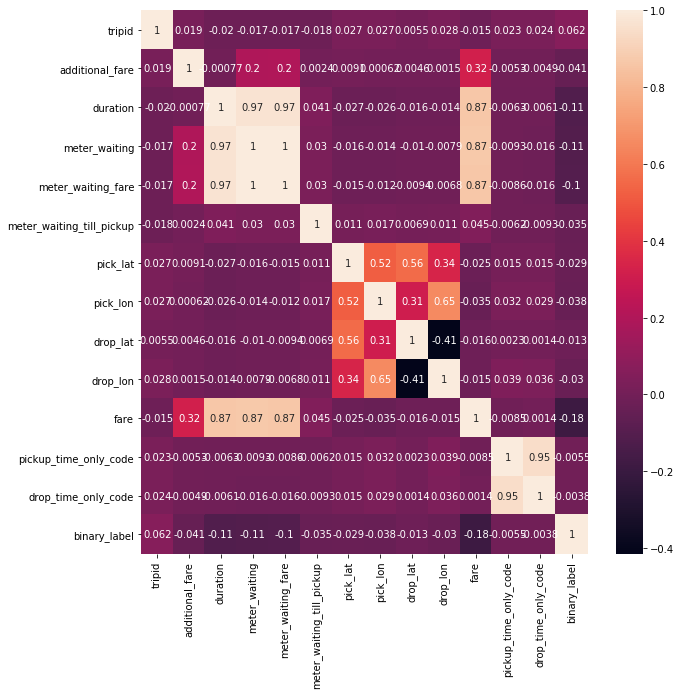

In [10]:
plt.figure(figsize = (10,10))
sn.heatmap(corrMatrix, annot=True)


the correaltion matrix shows these correlatrions:additional fare is correlated with meter_waiting and meter_waiting_fare. 

fare is strongly correlated with duration, meter_waiting, meter_waiting_fare. additional_fare affects fare
     

pick_lon, pick_lat, drop_lon and drop_lat correlated to each other but don't show any direct correlation with fare.

meter_wating and meter_waiting_fare correlation to duration

no much correlated features with label correct or incorrect

In [11]:
fare_data_train = fare_data_train.drop(['tripid', 'additional_fare', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'meter_waiting_till_pickup', 'pickup_time', 'pickup_time_only', 'drop_time_only', 'drop_time', 'label'], axis=1)
fare_data_train.head()

,duration,meter_waiting,meter_waiting_fare,fare,pickup_time_only_code,drop_time_only_code,binary_label
0,834.0,56.0,0.0000,270.32,19,34,1
1,791.0,47.0,0.0000,197.85,52,69,1
2,1087.0,80.0,0.0000,301.64,62,81,1
3,598.0,271.0,15.6638,82.30,118,133,1
4,NaN,NaN,NaN,358.39,163,179,1


In [12]:
fare_data_train.isnull().sum()

duration                 202
meter_waiting            202
meter_waiting_fare       202
fare                     137
pickup_time_only_code      0
drop_time_only_code        0
binary_label               0
dtype: int64

as the additional_fare and fare things are zero, those values are recorded and let's replace them by zero

In [13]:
fare_data_train = fare_data_train.fillna(0)
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
fare_data_train.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 duration                 0
meter_waiting            0
meter_waiting_fare       0
fare                     0
pickup_time_only_code    0
drop_time_only_code      0
binary_label             0
dtype: int64


In [14]:
fare_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration               17176 non-null  float64
 1   meter_waiting          17176 non-null  float64
 2   meter_waiting_fare     17176 non-null  float64
 3   fare                   17176 non-null  float64
 4   pickup_time_only_code  17176 non-null  int32  
 5   drop_time_only_code    17176 non-null  int32  
 6   binary_label           17176 non-null  int32  
dtypes: float64(4), int32(3)
memory usage: 738.2 KB


In [15]:
X = fare_data_train.drop(['binary_label'], axis=1)
X.head()

,duration,meter_waiting,meter_waiting_fare,fare,pickup_time_only_code,drop_time_only_code
0,834.0,56.0,0.0000,270.32,19,34
1,791.0,47.0,0.0000,197.85,52,69
2,1087.0,80.0,0.0000,301.64,62,81
3,598.0,271.0,15.6638,82.30,118,133
4,0.0,0.0,0.0000,358.39,163,179


In [16]:
y = fare_data_train['binary_label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: binary_label, dtype: int32

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
# from sklearn.svm import SVC
# svclassifier = SVC(kernel='poly', degree=8)
# svclassifier.fit(X_train, y_train)

In [19]:
# y_pred = svclassifier.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[  10  308]
 [   0 3118]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       318
           1       0.91      1.00      0.95      3118

    accuracy                           0.91      3436
   macro avg       0.96      0.52      0.51      3436
weighted avg       0.92      0.91      0.87      3436



In [22]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  65  253]
 [  67 3051]]
              precision    recall  f1-score   support

           0       0.49      0.20      0.29       318
           1       0.92      0.98      0.95      3118

    accuracy                           0.91      3436
   macro avg       0.71      0.59      0.62      3436
weighted avg       0.88      0.91      0.89      3436



In [23]:
X_submit_raw = pd.read_csv("test.csv", parse_dates=['pickup_time', 'drop_time'])
X_submit_raw['pickup_time_only'] = X_submit_raw['pickup_time'].dt.time
X_submit_raw['drop_time_only'] = X_submit_raw['drop_time'].dt.time
lb_label = LabelEncoder()
X_submit_raw["pickup_time_only_code"] = lb_label.fit_transform(X_submit_raw["pickup_time_only"])
X_submit_raw["drop_time_only_code"] = lb_label.fit_transform(X_submit_raw["drop_time_only"])
X_submit_raw[["pickup_time_only", "pickup_time_only_code", "drop_time_only", "drop_time_only_code"]].head(11)
X_submit = X_submit_raw.drop(['tripid', 'additional_fare', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'meter_waiting_till_pickup', 'pickup_time', 'pickup_time_only', 'drop_time_only', 'drop_time'], axis=1)

X_submit.head()

,duration,meter_waiting,meter_waiting_fare,fare,pickup_time_only_code,drop_time_only_code
0,924,42,2.4486,289.27,28,46
1,4249,20,0.0000,1912.70,45,89
2,1552,255,2.6588,394.00,137,170
3,462,16,0.0000,154.32,150,175
4,814,392,12.3692,147.47,225,252


In [24]:
y_pred = svclassifier.predict(X_submit)
pd.DataFrame(y_pred, columns=['prediction']).to_csv('prediction.csv')